In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

sys.path.append('../src')
from clustering_algos import opt_kmeans, opt_kmeans_with_weights, backtrack
np.random.seed(seed = 0)

In [70]:
m = [0,3,6]
data = np.random.normal(loc = m, scale = [0.5]*3, size = [100,3])
data = np.sort(data.reshape([-1]))
#data = np.random.uniform(0,10,300)
#data = np.sort(data.reshape([-1]))
#data = np.arange(300)
k=9

In [71]:
#1d optimal kmeans no weights
D1,B1 = opt_kmeans(data, k)

#1d optimal kmeans with weights
weights = np.ones(shape = [len(data)])
#weights[0:200] = 1000000
#weights = weights/np.sum(weights)  
D,B = opt_kmeans_with_weights(data, k, weights = weights)


In [110]:
kb = 6
ints1 = backtrack(B1, len(data), kb)
ints = backtrack(B, len(data), kb)


In [111]:
ints == ints1

True

In [112]:
ints

[0, 35, 101, 147, 201, 245, 300]

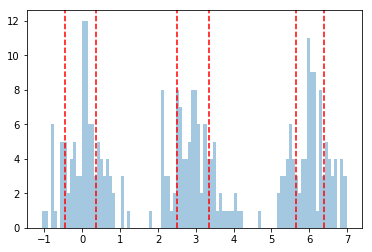

In [113]:
fig, ax = plt.subplots(1,1)
ax = sns.distplot(data, bins = 100, kde = False,ax = ax)
for i in range(1,len(ints)):
    mu = np.sum(data[int(ints[i-1]):int(ints[i])]*weights[ints[i-1]:ints[i]])/sum(weights[ints[i-1]:ints[i]])
    #print(mu)
    ax.axvline(x = mu, color = 'r', linestyle = '--')